# Support Vector Machine (SVM) - Bird's-Eye View

In this notebook, we provide a bird's-eye view representation of the main algorithms of the Support Vector Machine (SVM) model for solving binary classification problems. However, we need to be aware of the limitation of this type of extreme summarization.

There are certain things that are not summarizable!

Why not?

Let's look at two quick examples.


### Anna Karenina in a Single Line!!!!

What would a one-line summary of Count Tolstoy's novel Anna Karenina?

    Anna Karenina is the story of Anna Karenina's unhappy marital life.
    
   or

    Anna Karenina portrays a panoramic view of Imperial Russia.


None of these summaries do any justice to the 800+ page long masterpiece. It is not possible to represent Anna Karenina in one line, or in one paragraph, or even one page.


Another example.


### Monet in Grayscale!!!!

What if we represent a color print of Monet's impressionist masterpiece **Sunrise** in grayscale?

<img src="https://cse.unl.edu/~hasan/Pics/Sunrise_Monet.png" width=500, height=400>




The **Sunrise** in grayscale is a disaster, no less than a crime! All of its impressionist nuances are gone. One can no loger render its majestic glory.

<img src="https://cse.unl.edu/~hasan/Pics/Sunrise_Monet_grayscale.png" width=500, height=400>



## SVM: Mindless Summarization

Stripping the presentation of SVM of its mathematical splendor is equally disastrous. Yet to sketch its key approaches for solving classification problems, we take a 10000 feet view of SVM .

We depict SVM in broad strokes. Let's say that we want to solve a binary classification problem. 

SVM tries to maximize the width of the decision boundary. But it has to satisfy a constraint, i.e., samples of two classes should be above and below their respective margins. 


<img src="https://cse.unl.edu/~hasan/Pics/SVM-Max-MarginClassifier.png" width=400, height=300>




### Algorithms
This margin maximization problem is modeled as a **constrained optimization** problem subject to an inequality constraint. There are two formulations of this maximization problem.

- Primal
- Dual



There are two cases:
- Linear dataset (classes are linearly separable)
- Nonlinear dataset (classes are not linearly separable)

For the linear dataset, there are two sub-cases:
- Low-dimensional data
- High-dimensional data

#### Linear Dataset: Low-dimensional


The primal algorithm can be used for this type of dataset. However, it is ineffcient for high-dimensional data.


#### Linear Dataset: High-dimensional

The dual algorithm is efficient for high-dimensional data. However, it is inefficient for large dataset.

The dual algorithm has **another advantage** that is suitable for nonlinear dataset.



#### Nonlinear Dataset

For a **nonlinear dataset**, we need to augment the features, which increases the model's complexity. The dual algorithm allows to augment the data without increasing a model's complexity. This magical property is achieved by the **kernel trick**, which the dual algorithm enables to implement. 

A kernel is a function that allows to compute the dot product between the features in a high-dimensional space without enbedding the features in that space. There are various choices for the kernel function. In this notebook, we use the following kernel functions.
- Polynomial
- Gaussian Radial Basis Function (RBF)

Thus, the dual problem formulation is suitable for nonlinear data. Given a linearly non-separable dataset consisting of two classes, we use the dual algorithm with kernel trick. 



## Summary

We use two datasets for the study in this notebook:
- Linear
- Nonlinear

We study both the primal and dual algorithms for the SVM model.
- Primal
- Dual (without kernel)
- Dual (with Polynomial kernel)
- Dual (with Gaussian RBF kernel)

        There is a Gradient Descent algorithm for solving the max margin learning problem in SVM, which we don't discuss in this notebook.

## Scikit-Learn Implementation

To apply the primal algorithm, we use Scikit-Learn's LinearSVC class.

https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

For the dual algorithm, we use the SVC class with selected kernels.

https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html


We don't perform hyperparameter tuning to keep our presentation simple.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_circles
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, SVC
from sklearn.metrics import confusion_matrix

np.random.seed(43)

# Linear Data

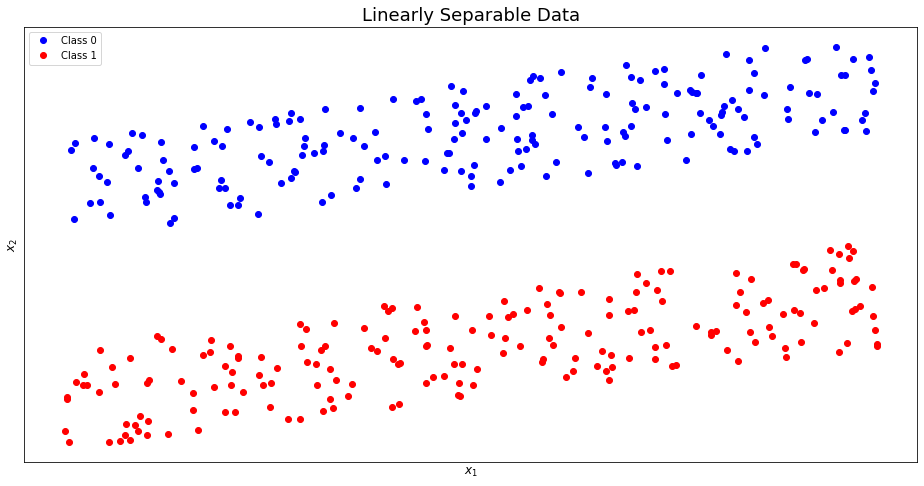

In [2]:
m0 = 200  # no. of training examples for class 0

# Generate class 0 data points randomly from a uniform distribution
#    Here a & b are 2 dimensions for each data (feature) point
a = np.random.rand(m0,1)
b = 4 + a + np.random.rand(m0,1)

# Concatenate the 2 dimensions of each feature to create the data matrix for class 0 
X0 = np.concatenate((a, b), axis=1)

# Create the target vector for class 0 (target is coded with zeros)
X0_target = np.zeros((m0,), dtype=np.int).reshape(-1, 1)

m1 = 200  # no. of training examples for class 1

# Generate class 1 data points randomly from a uniform distribution
#    Here c & d are 2 dimensions for each data (feature) point
c = np.random.rand(m1,1)
d = 6 + c + np.random.rand(m1,1)

# Concatenate the 2 dimensions of each feature to create the data matrix for class 1
X1 = np.concatenate((c, d), axis=1)

# Create the target vector for class 1 (target is coded with ones)
X1_target = np.ones((m1,), dtype=np.int).reshape(-1, 1)

# All training examples for class 0 and 1
X = np.append(X0, X1, axis=0)

# All target values for class 0 & 1
y = np.concatenate((X0_target, X1_target), axis=0)

# Create a 1D row vector ofthe target with float values
y = y.ravel()*1.0
#print(y)

# Draw a scatter plot
plt.figure(figsize=(16,8))
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bo", label="Class 0")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ro", label="Class 1")
plt.title("Linearly Separable Data", fontsize=18)
plt.legend(loc=2)
plt.xlabel("$x_1$", fontsize=12)
plt.ylabel("$x_2$", rotation=90, fontsize=12)
plt.xticks(())
plt.yticks(())
plt.show()

## SVM: Primal Problem

In [3]:
scaler = StandardScaler()
svm_clf_primal = LinearSVC(dual=False)

scaled_svm_clf_primal = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf_primal),
    ])

scaled_svm_clf_primal.fit(X, y)

y_predicted = scaled_svm_clf_primal.predict(X)


accuracy_score = np.mean(y_predicted == y)
print("\nTrain Accuracy: ", accuracy_score)

print("\nTrain Confusion Matrix:")
print(confusion_matrix(y, y_predicted))


Train Accuracy:  1.0

Train Confusion Matrix:
[[200   0]
 [  0 200]]


# Nonlinear Data

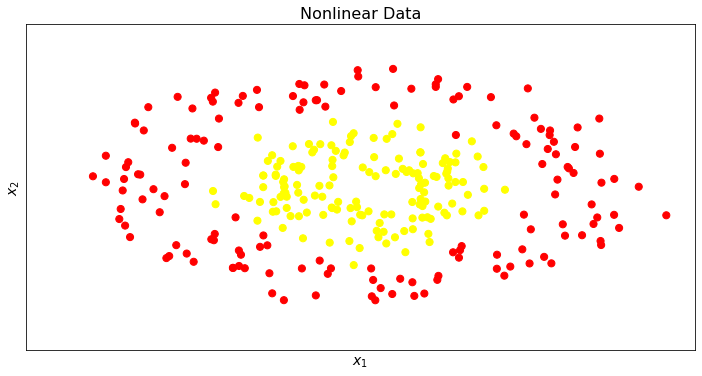

In [4]:
X, y = make_circles(300, factor=0.4, noise=0.15)

label = y

plt.figure(figsize=(12, 6))

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

plt.title("Nonlinear Data", fontsize=16)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14)
plt.axis([-1.5, 1.5, -1.7, 1.7])
plt.xticks(())
plt.yticks(())
plt.show()

## SVM: Primal Problem 

In [5]:
scaler = StandardScaler()
svm_clf_primal = LinearSVC(dual=False)

scaled_svm_clf_primal = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf_primal),
    ])

scaled_svm_clf_primal.fit(X, y)

y_predicted = scaled_svm_clf_primal.predict(X)


accuracy_score = np.mean(y_predicted == y)
print("\nTrain Accuracy: ", accuracy_score)

print("\nTrain Confusion Matrix:")
print(confusion_matrix(y, y_predicted))


Train Accuracy:  0.5066666666666667

Train Confusion Matrix:
[[73 77]
 [71 79]]


# SVM: Dual Problem without Kernel Trick

In [6]:
scaler = StandardScaler()
svm_clf_dual = LinearSVC(dual=True)


scaled_svm_clf_dual = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf_dual),
    ])

scaled_svm_clf_dual.fit(X, y)

y_predicted = scaled_svm_clf_dual.predict(X)


accuracy_score = np.mean(y_predicted == y)
print("\nTrain Accuracy: ", accuracy_score)

print("\nTrain Confusion Matrix:")
print(confusion_matrix(y, y_predicted))


Train Accuracy:  0.5066666666666667

Train Confusion Matrix:
[[73 77]
 [71 79]]


## SVM: Dual Problem with Kernel Trick (Polynomial Kernel)

In [7]:
scaler = StandardScaler()

svm_clf_poly = SVC(kernel='poly', degree=2)


scaled_svm_clf_poly = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf_poly),
    ])

scaled_svm_clf_poly.fit(X, y)

y_predicted = scaled_svm_clf_poly.predict(X)


accuracy_score = np.mean(y_predicted == y)
print("\nTrain Accuracy: ", accuracy_score)

print("\nTrain Confusion Matrix:")
print(confusion_matrix(y, y_predicted))


Train Accuracy:  0.9866666666666667

Train Confusion Matrix:
[[147   3]
 [  1 149]]


## SVM: Dual Problem with Kernel Trick (Gaussian RBF Kernel)

In [8]:
scaler = StandardScaler()
svm_clf_rbf = SVC(kernel="rbf")


scaled_svm_clf_rbf = Pipeline([
        ("scaler", scaler),
        ("linear_svc", svm_clf_rbf),
    ])

scaled_svm_clf_rbf.fit(X, y)

y_predicted = scaled_svm_clf_rbf.predict(X)


accuracy_score = np.mean(y_predicted == y)
print("\nTrain Accuracy: ", accuracy_score)

print("\nTrain Confusion Matrix:")
print(confusion_matrix(y, y_predicted))


Train Accuracy:  0.9833333333333333

Train Confusion Matrix:
[[147   3]
 [  2 148]]
